# Visualisation

In [1]:
import pandas as pd
import numpy as np
import re
import json

pd.set_option('display.max_columns',500)

In [3]:

df = pd.read_csv('allBrands_gemini_1_5_pro_002_2024_10_08.csv')
df.head(1)


,Brand_D2C,Product URL,Product Image,Images,Brand,Collaborations,Limited Edition,"Theme 1 (brand, collaborations)",Category,Sub-category,Type,Theme 2 (Product type),Dominant colour,Secondary colour,Design Elements,Aesthetic Type,Silhouette,Branding Style,Product Story,Tentative Pricing,Market Positioning,Willingness to Pay,Theme 3 (Market Position),Perceived Value Score,Price Elasticity,Consumer type,Desirability Index,Target consumer age group,Target consumer gender,Target consumer socioeconomic background,Target consumer Lifestyle,Target consumer Fashion Style,Occasions for Use (Social),Occasions for Use (Professional),Occasions for Use (Casual),Occasions for Use (Seasonal),Occasions for Use (Sports),Occasions for Use (Cultural),Occasions for Use (Travel),Theme 4 (Occasions),Heritage,Exclusivity,Theme 5 (Heritage)
0,Sorel,https://www.sorelfootwear.co.uk/p/caribou-mens...,https://columbia.scene7.com/is/image/ColumbiaS...,['https://columbia.scene7.com/is/image/Columbi...,Sorel,None evident in the image.,Unknown based on the image.,Sorel is known for its durable and functional ...,Footwear,Boots,Winter Boots / Snow Boots,The product's type as winter boots directly su...,Tan/Beige (upper),"Black (lower, laces)","Lace-up closure, faux fur trim, rubber sole, l...","Classic, utilitarian, outdoorsy","Structured, high-top","Subtle, with a small Sorel logo on the side.","The design tells a story of warmth, durability...",$150 - $200,Premium/Mid-range,$120 - $180,The theme of practicality and durability appea...,07-Oct,Low to moderate,"Premium consumers, outdoor enthusiasts, people...",07-Oct,25-55,Unisex (likely skews slightly towards female),Middle to upper-middle class,"Active, outdoorsy, appreciates quality and fun...","Casual, practical, with an appreciation for cl...","Winter walks, après-ski activities, casual gat...","Not ideal for formal professional settings, bu...","Everyday wear in winter, running errands, week...",Fall and Winter,"Winter hiking, snowshoeing, other light winter...","Winter festivals, holiday markets.","Winter vacations, trips to cold climates.",The theme of practicality and warmth makes the...,Sorel has a long history of making winter boot...,"Not particularly exclusive, unless part of a s...",The heritage of quality and durability reinfor...


In [1713]:
df.Category.value_counts(dropna=False)

Category
Footwear       4250
Accessories       4
Name: count, dtype: int64

In [1714]:
df['Sub-category'].value_counts(dropna=False)

Sub-category
Sneakers                 2729
Boots                     805
Shoes                     210
Sandals                   170
Slides                    140
Slippers                   97
Men's Dress Shoes          29
Slides/Sandals             18
Heels                      12
Slippers/Mules              7
Clogs/Slides                6
Men's Shoes                 6
Clogs                       4
Handbags                    4
Sneakers/Boots              3
Flats                       3
Golf Shoes                  3
Slippers/Slides             2
Slippers/Boot liners        2
Slippers/Indoor Boots       1
Slip-ons                    1
Slip-on shoes               1
Dress Shoes                 1
Name: count, dtype: int64

In [14]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pankajshukla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pankajshukla/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pankajshukla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pankajshukla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
stop_words = list(set(stopwords.words('english')))

In [20]:

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [1719]:
import matplotlib.colors as mcolors


In [1720]:

def get_unique_words(items_list):
    unique_words = set()
    
    for item in items_list:
        words = re.split(r'[ /]', item)
        unique_words.update(words)

    text_words_ = list(unique_words)

    text_words = []
    for t in text_words_:
        text_words.append(lemmatize_text(t))
    
    return text_words




def find_word_occurrences(word_list, text):
    word_occurrences = {}
    items_list = text.lower().split()

    unique_words = set()
    for item in items_list:
        words = re.split(r'[ /]', item)
        unique_words.update(words)  # Add each word to the set

    text_words_ = list(unique_words)

    text_words = []
    for t in text_words_:
        text_words.append(lemmatize_text(t))
    
    for word in word_list:
        word_lower = word.lower()
        word_occurrences[word] = text_words.count(word_lower)
    
    return word_occurrences



def apply_word_occurrences_to_df(row, text_column, word_list):
    row['word_occurrences'] = row[text_column].apply(lambda x: find_word_occurrences(word_list, x))
    return row



def find_first_match(word_list, text):

    items_list = text.lower().split()
    unique_words = set()
    for item in items_list:
        words = re.split(r'[ /]', item)
        unique_words.update(words)
        
    text_words_ = list(unique_words)

    text_words = []
    for t in text_words_:
        text_words.append(lemmatize_text(t))


    for word in text_words:
        if word in [w.lower() for w in word_list]:
            return word
    return 'unknown'
    

def apply_find_first_match_to_df(row, text_column, word_list):
    row['new_'+col] = row[text_column].apply(lambda x: find_first_match(word_list, x))
    return row


def remove_words_from_list(main_list, remove_list):
    filtered_list = [word for word in main_list if word not in remove_list]
    return filtered_list

In [1721]:
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)

    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

def shorten_list(input_list, max_distance):
    unique_words = []

    for word in input_list:
        # Check if the word is similar to any already stored unique words
        if not any(levenshtein_distance(word, unique_word) <= max_distance for unique_word in unique_words):
            unique_words.append(word)

    return unique_words


In [1722]:
col = 'Sub-category'

df[col] = df[col].str.lower()
df[col] = df[col].str.replace(',','')
df[col] = df[col].str.replace("'",'')
df[col] = df[col].str.strip()

unique_words = get_unique_words(df[col].unique())
word_list = unique_words


df_WF = apply_word_occurrences_to_df(df, col, word_list)
df_WF = pd.DataFrame(df_WF['word_occurrences'].tolist())


WF = pd.DataFrame(df_WF[word_list].sum()).reset_index()
WF.columns=[col, 'word_freq']
WF = WF.sort_values('word_freq', ascending=False)

word_list = WF[col].unique()
print(word_list)
df = apply_find_first_match_to_df(df, col, word_list)


['sneaker' 'boot' 'shoe' 'sandal' 'slide' 'slipper' 'men' 'dress' 'heel'
 'clog' 'mule' 'handbag' 'golf' 'flat' 'liner' 'slip-on' 'indoor']


In [1723]:
subcat_list = list(df['new_'+col].unique())
subcat_list

['boot',
 'slipper',
 'liner',
 'sneaker',
 'sandal',
 'shoe',
 'slip-on',
 'clog',
 'mule',
 'slide',
 'heel',
 'flat',
 'dress',
 'handbag',
 'golf',
 'men']

In [1724]:
df['new_'+col].value_counts(dropna=False)

new_Sub-category
sneaker    2729
boot        809
shoe        210
sandal      188
slide       140
slipper      99
dress        30
heel         12
clog         10
mule          7
men           6
handbag       4
flat          3
golf          3
liner         2
slip-on       2
Name: count, dtype: int64

In [1725]:
col = 'Type'

df[col] = df[col].str.lower()
df[col] = df[col].str.replace(',','')
df[col] = df[col].str.replace("'",'')
df[col] = df[col].str.strip()

unique_words = get_unique_words(df[col].unique())
word_list = unique_words

In [1726]:

# Example usage
input_list = word_list
# max_distance = 2

# word_list = shorten_list(input_list, max_distance)
# print(f"Shortened list: {word_list}")
if '' in word_list:
     word_list.remove('')

In [1727]:

df_WF = apply_word_occurrences_to_df(df, col, word_list)
df_WF = pd.DataFrame(df_WF['word_occurrences'].tolist())

WF = pd.DataFrame(df_WF[word_list].sum()).reset_index()
WF.columns=[col, 'word_freq']
WF = WF.sort_values('word_freq', ascending=False)

word_list = WF[col].unique()
print(word_list[:10])

word_list = remove_words_from_list(word_list, subcat_list)

word_list = word_list
print(word_list[:10])

df = apply_find_first_match_to_df(df, col, word_list)


['sneaker' 'low-top' 'boot' 'slip-on' 'running' 'winter' 'knit' 'ankle'
 'high-top' 'shoe']
['low-top', 'running', 'winter', 'knit', 'ankle', 'high-top', 'training', 'platform', 'athletic', 'snow']


In [1728]:
df[col].value_counts()[:15]

Type
low-top sneakers                     1154
high-top sneakers                     207
slip-on sneakers                      204
low-top running/training sneakers     132
low-top slip-on sneakers              123
winter boots / snow boots              99
low-top running/athletic sneakers      86
low-top knit sneakers                  85
slip-on knit sneakers                  83
low-top sneakers / running shoes       76
slip-on slides                         68
winter boots                           66
low-top running/training shoes         48
mule slippers                          45
lace-up ankle boots                    43
Name: count, dtype: int64

In [1729]:
df['new_'+col].value_counts(dropna=False)

new_Type
low-top     1547
unknown      479
running      456
high-top     218
snow         155
            ... 
comfort        1
buckle         1
without        1
standard       1
trail          1
Name: count, Length: 113, dtype: int64

In [1730]:
df[df['new_'+col]=='unknown']['Sub-category'].unique()

array(['boots', 'slippers', 'slippers/boot liners', 'sandals', 'shoes',
       'slip-on shoes', 'slippers/slides', 'slippers/mules',
       'clogs/slides', 'slip-ons', 'clogs', 'slides', 'sneakers',
       'slides/sandals', 'heels'], dtype=object)

In [1731]:
df['new_'+col].value_counts().sum()

4254

# Colors

In [1733]:
df.columns

Index(['Brand_D2C', 'Product URL', 'Product Image', 'Images', 'Brand',
       'Collaborations', 'Limited Edition', 'Theme 1 (brand, collaborations)',
       'Category', 'Sub-category', 'Type', 'Theme 2 (Product type)',
       'Dominant colour', 'Secondary colour', 'Design Elements',
       'Aesthetic Type', 'Silhouette', 'Branding Style', 'Product Story',
       'Tentative Pricing', 'Market Positioning', 'Willingness to Pay',
       'Theme 3 (Market Position)', 'Perceived Value Score',
       'Price Elasticity', 'Consumer type', 'Desirability Index',
       'Target consumer age group', 'Target consumer gender',
       'Target consumer socioeconomic background', 'Target consumer Lifestyle',
       'Target consumer Fashion Style', 'Occasions for Use (Social)',
       'Occasions for Use (Professional)', 'Occasions for Use (Casual)',
       'Occasions for Use (Seasonal)', 'Occasions for Use (Sports)',
       'Occasions for Use (Cultural)', 'Occasions for Use (Travel)',
       'Theme 4 (Occ

# Get Frequency

In [1735]:
def get_frequency(df_, col):

    df_[col] = df_[col].str.lower()
    df_[col] = df_[col].str.replace('"','').str.replace("'",'')
    df_[col] = df_[col].str.replace(")",'').str.replace("(",'').str.replace("-",'')
    df_[col] = df_[col].str.strip()

    unique_words = get_unique_words(df_[col].unique())
    word_list = unique_words
    word_list = remove_words_from_list(word_list, stop_words)
    
    df_WF = apply_word_occurrences_to_df(df_, col, word_list)
    df_WF = pd.DataFrame(df_WF['word_occurrences'].tolist())
    
    WF = pd.DataFrame(df_WF[word_list].sum()).reset_index()
    WF.columns=[col, 'word_freq']
    WF = WF.sort_values('word_freq', ascending=False)
    return WF



In [1736]:

import plotly.figure_factory as ff
import plotly.express as px
import streamlit as st

def display_scatter_chart(df_, _description, x, y, z, w, v, width, height):
    if df_.empty is False:
        fig = px.scatter(df_, x=x, y=y, title=_description, size=z, color=v, size_max=40,
                         color_discrete_sequence=px.colors.qualitative.Set3)
        fig.update_layout(autosize=False, width=width, height=height)
        fig.update_traces(marker=dict(symbol=w))
        fig.show()

In [1737]:
def display_bar_chart(df_, _description, x, y, v, width, height):
    if df_.empty is False:
        fig = px.bar(df_, x=x, y=y, title=_description, color=v, color_discrete_sequence=px.colors.qualitative.Set2)
        fig.update_layout(autosize=False, width=width, height=height)
        fig.show()

# Visual 1

In [1767]:
field0 = 'new_' + 'Sub-category'
df0 = df.groupby([field1])['Product Image'].nunique(dropna=False).reset_index()
df0.rename(columns={'Product Image': 'product_count'}, inplace=True)
df0['product_count%'] = round((df0['product_count'] / df0['product_count'].sum()) * 100,1)
df0.head(3)

,new_Sub-category,product_count,product_count%
0,boot,809,19.0
1,clog,10,0.2
2,dress,30,0.7


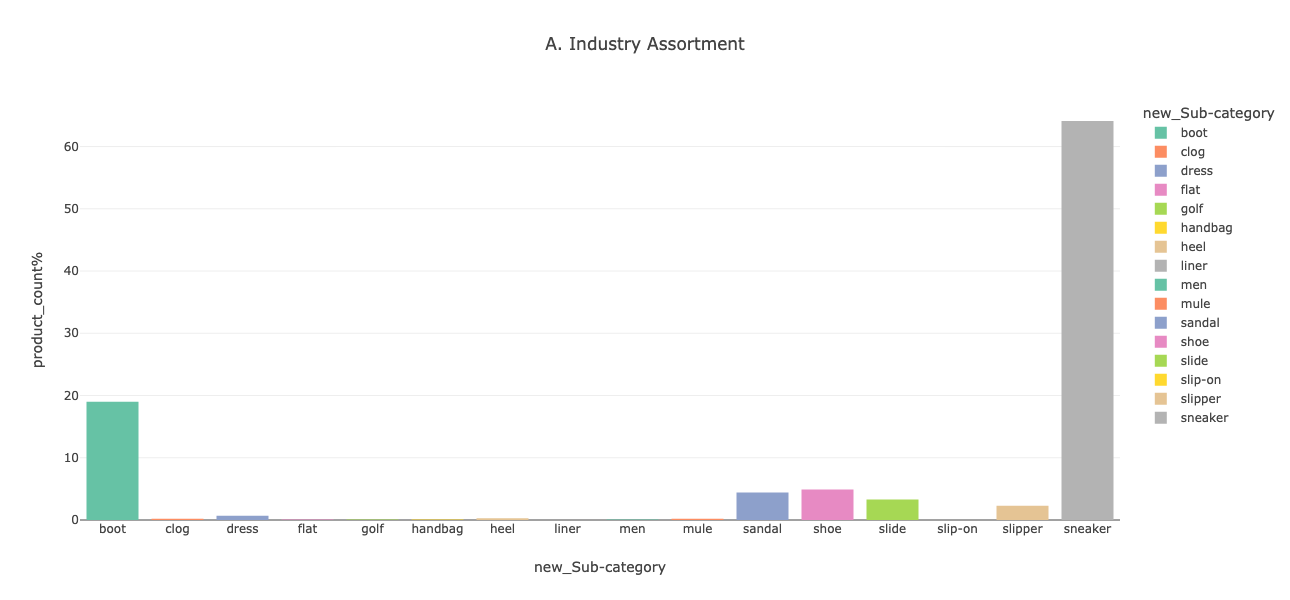

In [1768]:
display_bar_chart(df0, _description="A. Industry Assortment", x=field0, y='product_count%', v= field0, width=1000, height=600)

# Visual 2

In [1770]:
field1 = 'new_' + 'Sub-category'
df1 = df.groupby(['Brand_D2C',field1])['Product Image'].nunique(dropna=False).reset_index()
df1.rename(columns={'Product Image': 'product_count'}, inplace=True)
df1['product_count_grp'] = df1.groupby(['Brand_D2C'])['product_count'].transform('sum')
df1['product_count%'] = round((df1['product_count'] / df1['product_count_grp']) * 100,1)
df1.head(3)

,Brand_D2C,new_Sub-category,product_count,product_count_grp,product_count%
0,APL,boot,2,1420,0.1
1,APL,sandal,28,1420,2.0
2,APL,slide,113,1420,8.0


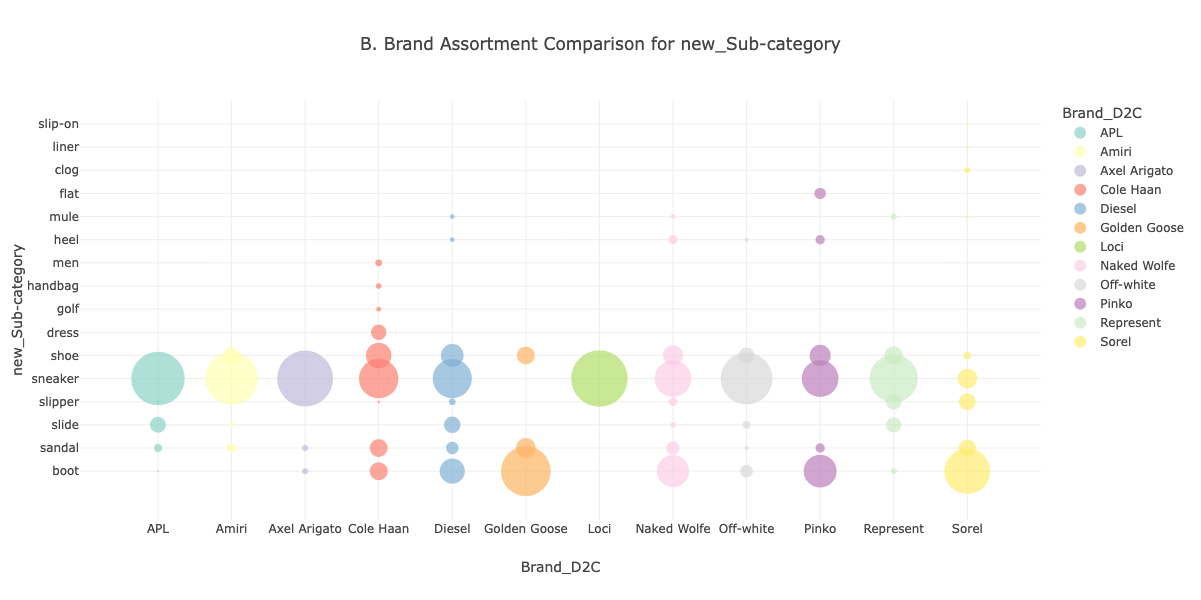

In [1771]:
display_scatter_chart(df1, _description="B. Brand Assortment Comparison for " + field1, x='Brand_D2C', 
              y=field1, z='product_count%', w='circle', v='Brand_D2C', width=1200, height=600)

# Visual 3

In [1773]:
field2 = 'new_' + 'Type'

df2 = df[df[field1]=='sneaker']
df2 = df2.groupby(['Brand_D2C',field])['Product Image'].nunique(dropna=False).reset_index()
df2.rename(columns={'Product Image': 'product_count'}, inplace=True)
df2['product_count_grp'] = df2.groupby(['Brand_D2C'])['product_count'].transform('sum')
df2['product_count%'] = round((df2['product_count'] / df2['product_count_grp']) * 100,1)
df2.head(3)

,Brand_D2C,new_Type,product_count,product_count_grp,product_count%
0,APL,athleisure,13,1273,1.0
1,APL,athletic,44,1273,3.5
2,APL,basketball,4,1273,0.3


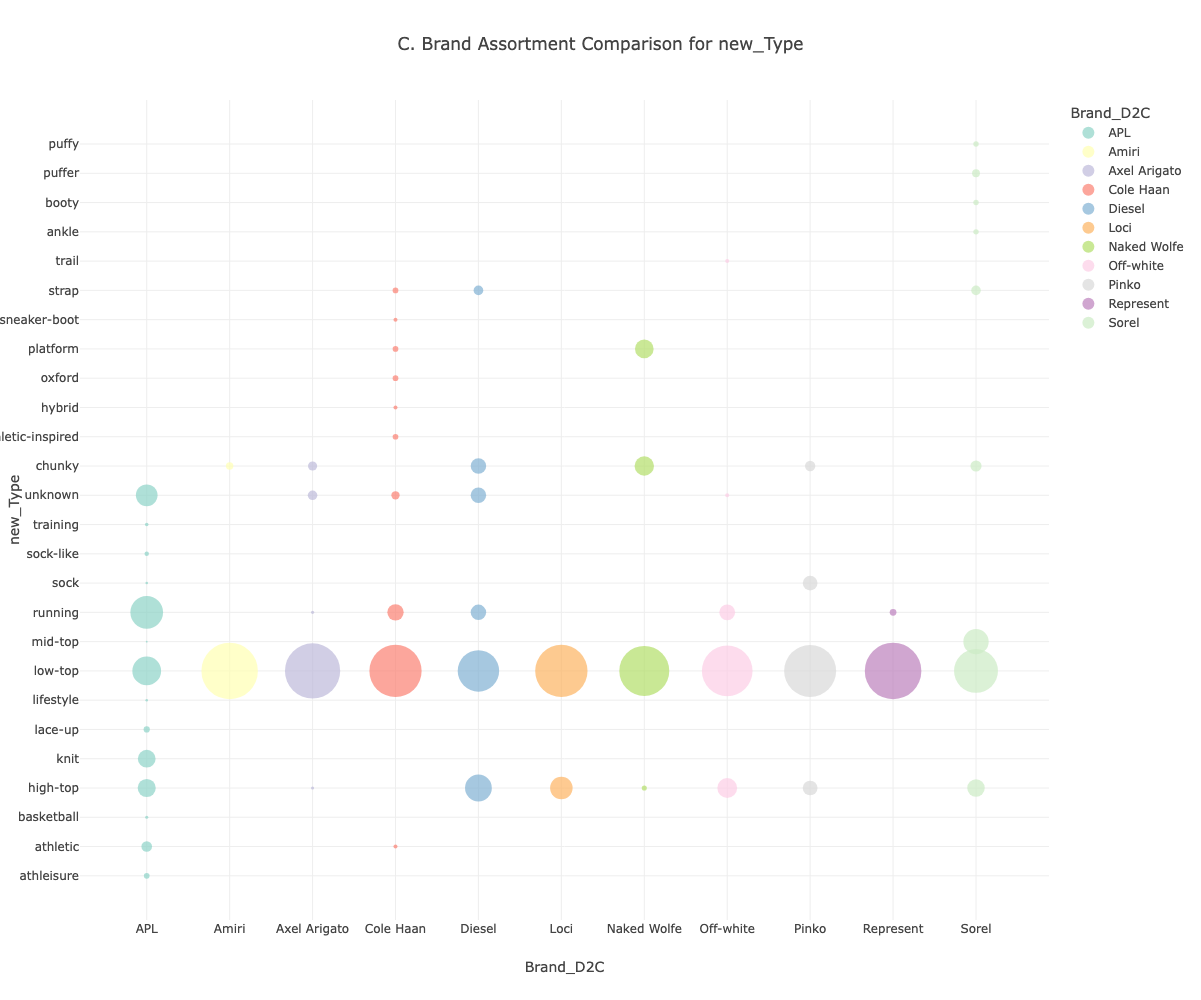

In [1774]:
display_scatter_chart(df2, _description="C. Brand Assortment Comparison for " + field2, x='Brand_D2C', 
              y=field2, z='product_count%', w='circle', v='Brand_D2C', width=1200, height=1000)

# Visual 4

In [1776]:

def get_hex(color_name):
    try:
        hex_value = mcolors.CSS4_COLORS[color_name]
        return str(hex_value)
    except:
        if color_name == 'dark':
            return'#000000'
        if color_name == 'dark-red':
            return '#8B0000'
        if color_name == 'light':
            return '#FFFFF8'
        if color_name == 'cream':
            return '#FFFDD0'
        if color_name == 'light-blue':
            return '#ADD8E6'
        if color_name == 'light-gray':
            return '#D3D3D3'
        if color_name in ['off-white', 'offwhite']:
            return '#F8F8F0'
        if color_name == 'dark-blue':
            return '#00008B'
        if color_name == 'dark-green':
            return '#006400'   
        if color_name == 'leopard':
            return '#C19A6B' 
        if color_name == 'charcoal':
            return '#36454F' 
        else:
            return '#39FF14'


In [1777]:
df['Brand_D2C'].unique()

array(['Sorel', 'Naked Wolfe', 'Amiri', 'APL', 'Represent', 'Pinko',
       'Cole Haan', 'Golden Goose', 'Diesel', 'Loci', 'Axel Arigato',
       'Off-white'], dtype=object)

Sorel
Naked Wolfe
Amiri
APL


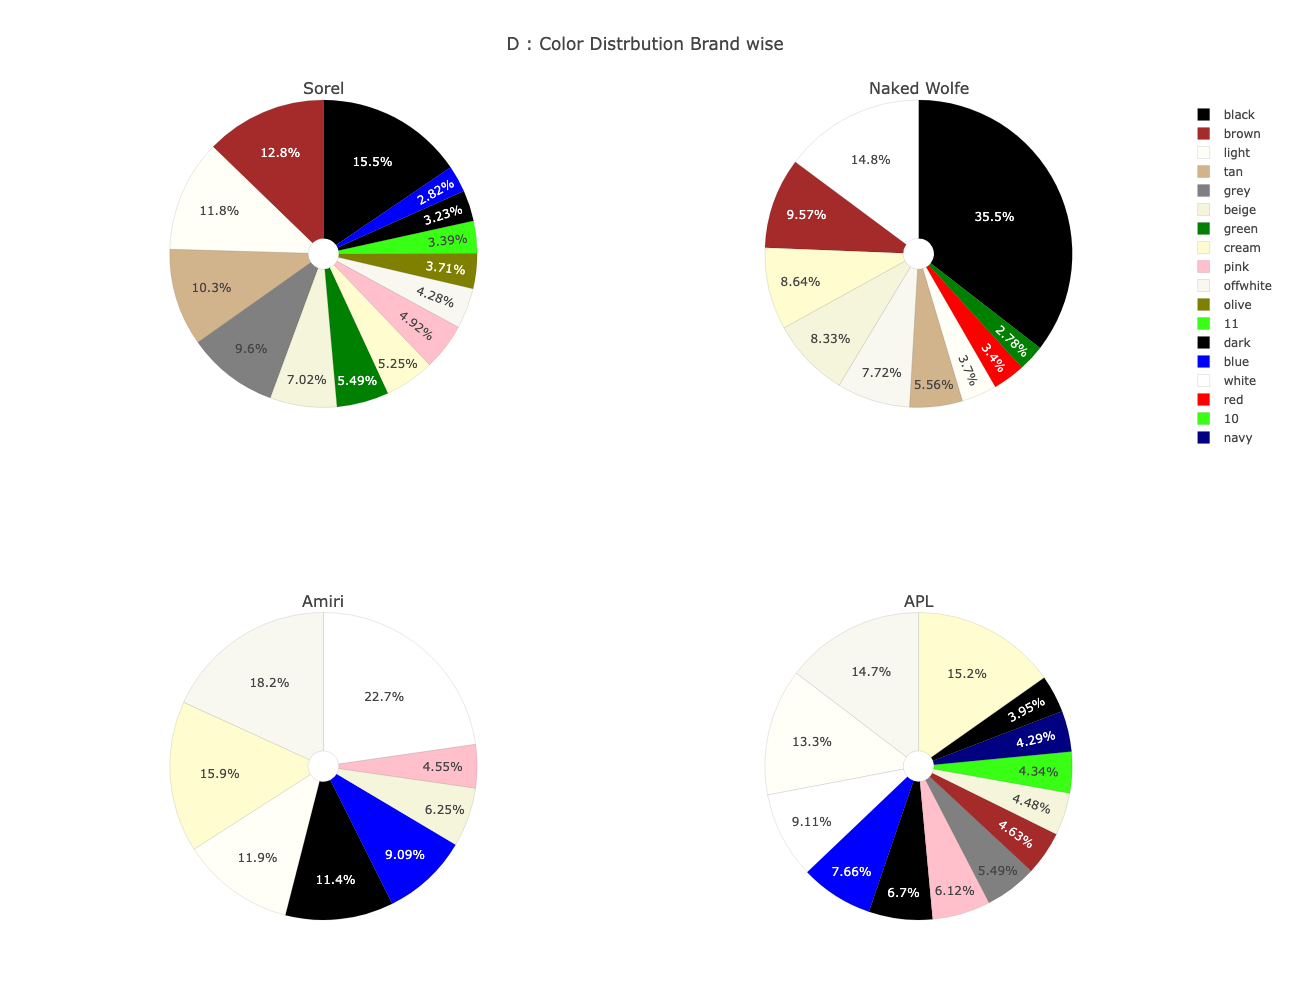

In [1778]:
_brandList = ['Sorel', 'Naked Wolfe', 'Amiri', 'APL']
df3 = {}
for b in _brandList:

    col = 'Dominant colour'

    df_temp = df[df['Brand_D2C']==b]
    df_temp = get_frequency(df_temp, col)
    df_temp = df_temp.reset_index()
    df_temp.drop(columns='index', inplace=True)
    df_temp['color_HEX'] = df_temp[col].apply(lambda x: get_hex(x))
    df_temp =  df_temp[df_temp['word_freq']>= 0.02* int(df_temp['word_freq'].sum())]

    df3[b] = df_temp

import plotly.graph_objs as go
from plotly.subplots import make_subplots

categories = [None]*4
values = [None]*4
colors = [None]*4

i = 0 
for k in list(df3.keys()):
    print(k)
    categories[i] = df3[k]['Dominant colour']
    values[i] = df3[k]['word_freq']
    colors[i] = df3[k]['color_HEX']
    i=i+1

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]], subplot_titles=tuple(df3.keys()))

fig.add_trace(go.Pie(labels=categories[0], values=values[0], name=_brandList[0], marker=dict(colors=colors[0]), hole=0.1), row=1, col=1)
fig.add_trace(go.Pie(labels=categories[1], values=values[1], name=_brandList[1], marker=dict(colors=colors[1]), hole=0.1), row=1, col=2)
fig.add_trace(go.Pie(labels=categories[2], values=values[2], name=_brandList[2], marker=dict(colors=colors[2]), hole=0.1), row=2, col=1)
fig.add_trace(go.Pie(labels=categories[3], values=values[3], name=_brandList[3], marker=dict(colors=colors[3]), hole=0.1), row=2, col=2)

fig.update_traces(marker=dict(line=dict(color='black', width=0.1)))

fig.update_layout(title_text="D : Color Distrbution Brand wise",height=1000, width=1000)
fig.show()


Represent
Pinko
Cole Haan
Golden Goose


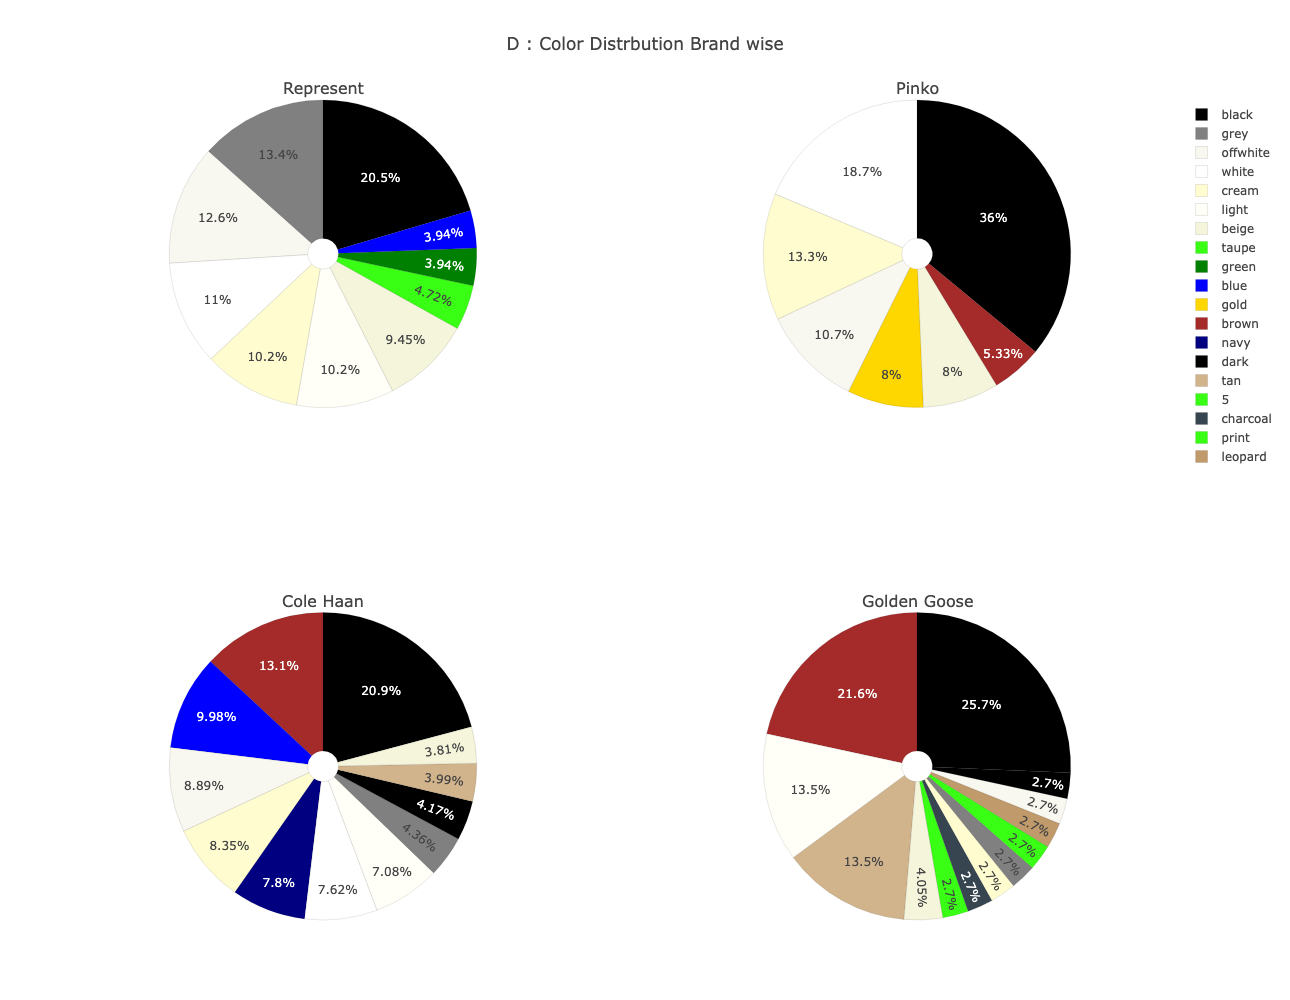

In [1779]:
_brandList = ['Represent', 'Pinko','Cole Haan', 'Golden Goose']

df3 = {}
for b in _brandList:

    col = 'Dominant colour'

    df_temp = df[df['Brand_D2C']==b]
    df_temp = get_frequency(df_temp, col)
    df_temp = df_temp.reset_index()
    df_temp.drop(columns='index', inplace=True)
    df_temp['color_HEX'] = df_temp[col].apply(lambda x: get_hex(x))
    df_temp =  df_temp[df_temp['word_freq']>= 0.02* int(df_temp['word_freq'].sum())]

    df3[b] = df_temp

import plotly.graph_objs as go
from plotly.subplots import make_subplots

categories = [None]*4
values = [None]*4
colors = [None]*4

i = 0 
for k in list(df3.keys()):
    print(k)
    categories[i] = df3[k]['Dominant colour']
    values[i] = df3[k]['word_freq']
    colors[i] = df3[k]['color_HEX']
    i=i+1

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]], subplot_titles=tuple(df3.keys()))

fig.add_trace(go.Pie(labels=categories[0], values=values[0], name=_brandList[0], marker=dict(colors=colors[0]), hole=0.1), row=1, col=1)
fig.add_trace(go.Pie(labels=categories[1], values=values[1], name=_brandList[1], marker=dict(colors=colors[1]), hole=0.1), row=1, col=2)
fig.add_trace(go.Pie(labels=categories[2], values=values[2], name=_brandList[2], marker=dict(colors=colors[2]), hole=0.1), row=2, col=1)
fig.add_trace(go.Pie(labels=categories[3], values=values[3], name=_brandList[3], marker=dict(colors=colors[3]), hole=0.1), row=2, col=2)

fig.update_traces(marker=dict(line=dict(color='black', width=0.1)))

fig.update_layout(title_text="D : Color Distrbution Brand wise",height=1000, width=1000)
fig.show()


Golden Goose
Diesel
Loci
Axel Arigato


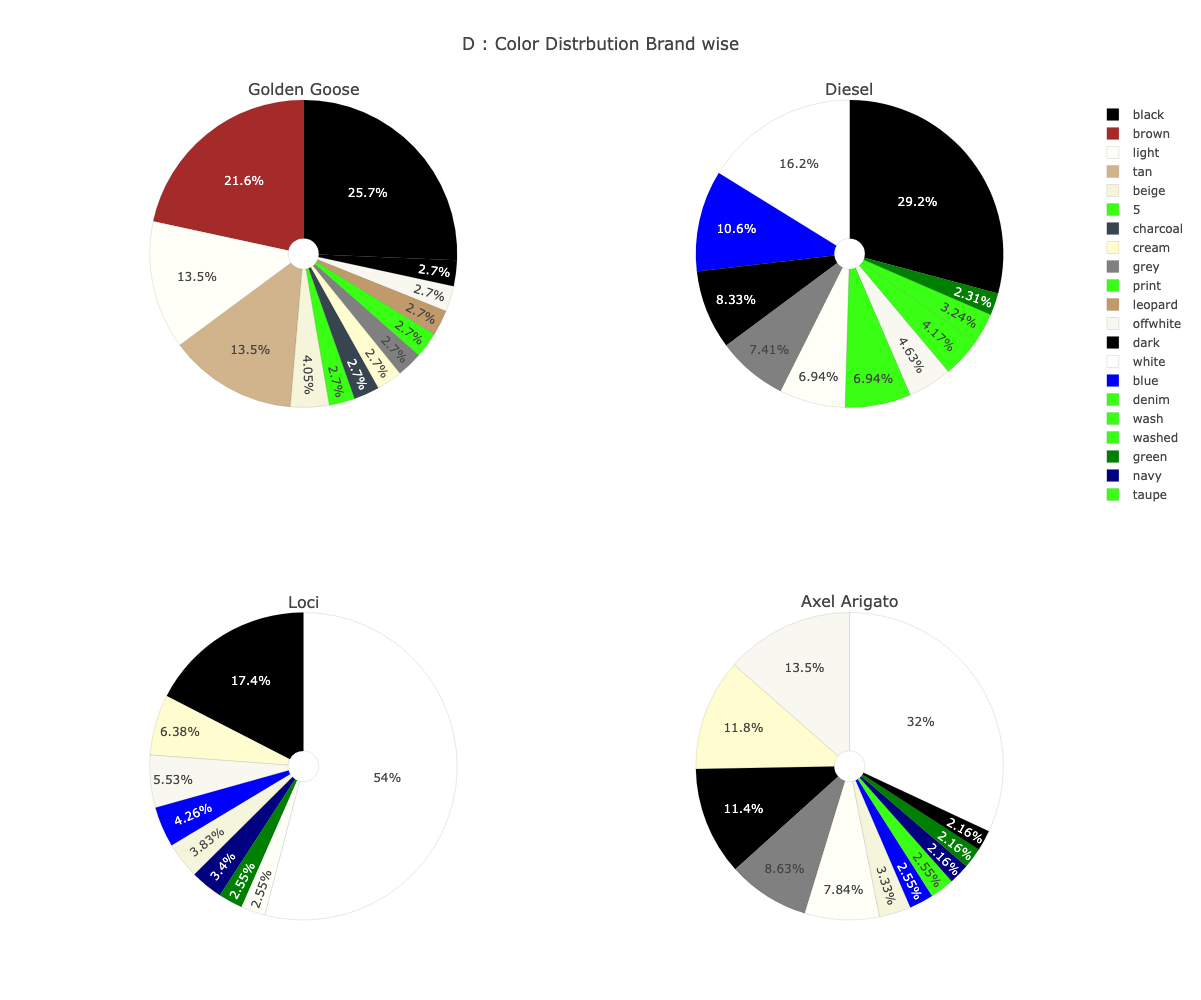

In [1780]:
_brandList = ['Golden Goose', 'Diesel', 'Loci', 'Axel Arigato']

df3 = {}
for b in _brandList:

    col = 'Dominant colour'

    df_temp = df[df['Brand_D2C']==b]
    df_temp = get_frequency(df_temp, col)
    df_temp = df_temp.reset_index()
    df_temp.drop(columns='index', inplace=True)
    df_temp['color_HEX'] = df_temp[col].apply(lambda x: get_hex(x))
    df_temp =  df_temp[df_temp['word_freq']>= 0.02* int(df_temp['word_freq'].sum())]

    df3[b] = df_temp

import plotly.graph_objs as go
from plotly.subplots import make_subplots

categories = [None]*4
values = [None]*4
colors = [None]*4

i = 0 
for k in list(df3.keys()):
    print(k)
    categories[i] = df3[k]['Dominant colour']
    values[i] = df3[k]['word_freq']
    colors[i] = df3[k]['color_HEX']
    i=i+1

fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]], subplot_titles=tuple(df3.keys()))

fig.add_trace(go.Pie(labels=categories[0], values=values[0], name=_brandList[0], marker=dict(colors=colors[0]), hole=0.1), row=1, col=1)
fig.add_trace(go.Pie(labels=categories[1], values=values[1], name=_brandList[1], marker=dict(colors=colors[1]), hole=0.1), row=1, col=2)
fig.add_trace(go.Pie(labels=categories[2], values=values[2], name=_brandList[2], marker=dict(colors=colors[2]), hole=0.1), row=2, col=1)
fig.add_trace(go.Pie(labels=categories[3], values=values[3], name=_brandList[3], marker=dict(colors=colors[3]), hole=0.1), row=2, col=2)

fig.update_traces(marker=dict(line=dict(color='black', width=0.1)))

fig.update_layout(title_text="D : Color Distrbution Brand wise",height=1000, width=1000)
fig.show()


# VISUAL 5

In [1782]:
df.columns

Index(['Brand_D2C', 'Product URL', 'Product Image', 'Images', 'Brand',
       'Collaborations', 'Limited Edition', 'Theme 1 (brand, collaborations)',
       'Category', 'Sub-category', 'Type', 'Theme 2 (Product type)',
       'Dominant colour', 'Secondary colour', 'Design Elements',
       'Aesthetic Type', 'Silhouette', 'Branding Style', 'Product Story',
       'Tentative Pricing', 'Market Positioning', 'Willingness to Pay',
       'Theme 3 (Market Position)', 'Perceived Value Score',
       'Price Elasticity', 'Consumer type', 'Desirability Index',
       'Target consumer age group', 'Target consumer gender',
       'Target consumer socioeconomic background', 'Target consumer Lifestyle',
       'Target consumer Fashion Style', 'Occasions for Use (Social)',
       'Occasions for Use (Professional)', 'Occasions for Use (Casual)',
       'Occasions for Use (Seasonal)', 'Occasions for Use (Sports)',
       'Occasions for Use (Cultural)', 'Occasions for Use (Travel)',
       'Theme 4 (Occ

In [1783]:
def extract_numeric_values(text):
    text = text.replace(",","")
    numeric_values = list(re.findall(r'\d+', text))
    if len(numeric_values)==2:
        return numeric_values
    else:
        print(text)
        value = [0,0]
        print(value)
        return value

In [1784]:
col = 'Tentative Pricing'
df['PricingList'] = df[col].apply(lambda x: extract_numeric_values(x))

-
[0, 0]
-
[0, 0]
-
[0, 0]
-
[0, 0]
$200 - $300 (standard) $250 - $350 (ankle tie)
[0, 0]
-
[0, 0]


In [1785]:
df[['MinPrice_Tentative', 'MaxPrice_Tentative']] = df['PricingList'].tolist()
df['MinPrice_Tentative'] = df['MinPrice_Tentative'].astype('int')
df['MaxPrice_Tentative'] = df['MaxPrice_Tentative'].astype('int')
df['Price_Tentative'] = (df['MinPrice_Tentative']+df['MaxPrice_Tentative'])/2

In [1786]:
df.head(3)

,Brand_D2C,Product URL,Product Image,Images,Brand,Collaborations,Limited Edition,"Theme 1 (brand, collaborations)",Category,Sub-category,Type,Theme 2 (Product type),Dominant colour,Secondary colour,Design Elements,Aesthetic Type,Silhouette,Branding Style,Product Story,Tentative Pricing,Market Positioning,Willingness to Pay,Theme 3 (Market Position),Perceived Value Score,Price Elasticity,Consumer type,Desirability Index,Target consumer age group,Target consumer gender,Target consumer socioeconomic background,Target consumer Lifestyle,Target consumer Fashion Style,Occasions for Use (Social),Occasions for Use (Professional),Occasions for Use (Casual),Occasions for Use (Seasonal),Occasions for Use (Sports),Occasions for Use (Cultural),Occasions for Use (Travel),Theme 4 (Occasions),Heritage,Exclusivity,Theme 5 (Heritage),word_occurrences,new_Sub-category,new_Type,PricingList,MinPrice_Tentative,MaxPrice_Tentative,Price_Tentative
0,Sorel,https://www.sorelfootwear.co.uk/p/caribou-mens...,https://columbia.scene7.com/is/image/ColumbiaS...,['https://columbia.scene7.com/is/image/Columbi...,Sorel,None evident in the image.,Unknown based on the image.,Sorel is known for its durable and functional ...,Footwear,boots,winter boots / snow boots,The product's type as winter boots directly su...,Tan/Beige (upper),"Black (lower, laces)","Lace-up closure, faux fur trim, rubber sole, l...","Classic, utilitarian, outdoorsy","Structured, high-top","Subtle, with a small Sorel logo on the side.","The design tells a story of warmth, durability...",$150 - $200,Premium/Mid-range,$120 - $180,The theme of practicality and durability appea...,07-Oct,Low to moderate,"Premium consumers, outdoor enthusiasts, people...",07-Oct,25-55,Unisex (likely skews slightly towards female),Middle to upper-middle class,"Active, outdoorsy, appreciates quality and fun...","Casual, practical, with an appreciation for cl...","Winter walks, après-ski activities, casual gat...","Not ideal for formal professional settings, bu...","Everyday wear in winter, running errands, week...",Fall and Winter,"Winter hiking, snowshoeing, other light winter...","Winter festivals, holiday markets.","Winter vacations, trips to cold climates.",The theme of practicality and warmth makes the...,Sorel has a long history of making winter boot...,"Not particularly exclusive, unless part of a s...",The heritage of quality and durability reinfor...,"{'outdoor': 0, 'heel': 0, 'sneaker-boot': 0, '...",boot,snow,"[150, 200]",150,200,175.0
1,Sorel,https://www.sorelfootwear.co.uk/p/caribou-mens...,https://columbia.scene7.com/is/image/ColumbiaS...,['https://columbia.scene7.com/is/image/Columbi...,SOREL,None evident in the image.,Unknown based on the image.,SOREL is known for its durable and functional ...,Footwear,boots,duck boots/winter boots,The product type reinforces the theme of pract...,Light Grey,Off-white/Cream,"Lace-up closure, rubber toe cap, contrasting c...","Casual, practical, outdoorsy","Rounded toe, mid-calf height","Subtle, likely a small SOREL logo on the boot ...",The design suggests a blend of functionality a...,$120 - $180,Premium/Mid-range,$100 - $200,The theme of practicality and all-weather suit...,07-Oct,Low to moderate,"Premium consumers, outdoor enthusiasts, indivi...",07-Oct,25-45,Unisex,Middle to upper-middle class,"Active, outdoorsy, appreciates both style and ...","Casual, practical, with an interest in current...","Casual gatherings, outdoor events, weekend err...","Not ideal for formal business settings, but su...","Everyday wear, walking, shopping, errands.","Fall, Winter, early Spring",Light outdoor activities like walking or hikin...,"Outdoor festivals, markets.","Weekend trips, city exploration, outdoor adven...",The product's versatile design makes it suitab...,SOREL has a heritage in producing durable and ...,Unknown based on the image.,SOREL's heritage of quality and practicality r...,"{'outdoor': 0, 'heel': 0, 'sneaker-boot': 0, '...",boot,duck,"[120, 180]",120,180,150.0
2

In [1801]:
df.Brand_D2C.unique()

array(['Sorel', 'Naked Wolfe', 'Amiri', 'APL', 'Represent', 'Pinko',
       'Cole Haan', 'Golden Goose', 'Diesel', 'Loci', 'Axel Arigato',
       'Off-white'], dtype=object)

In [ ]:
# _percentile = 0.95

_brandList = ['Sorel', 'Naked Wolfe', 'Amiri', 'APL']

df5 ={}

for b in _brandList:
    df_temp = df[(df['new_Sub-category']=='sneaker') & (df['Brand_D2C']==b)][['Price_Tentative']]
    df5[b] = df_temp

values = [None]*4

i = 0

for k in _brandList:
    print(k)
    values[i] = df5[k]['Price_Tentative']
    i=i+1

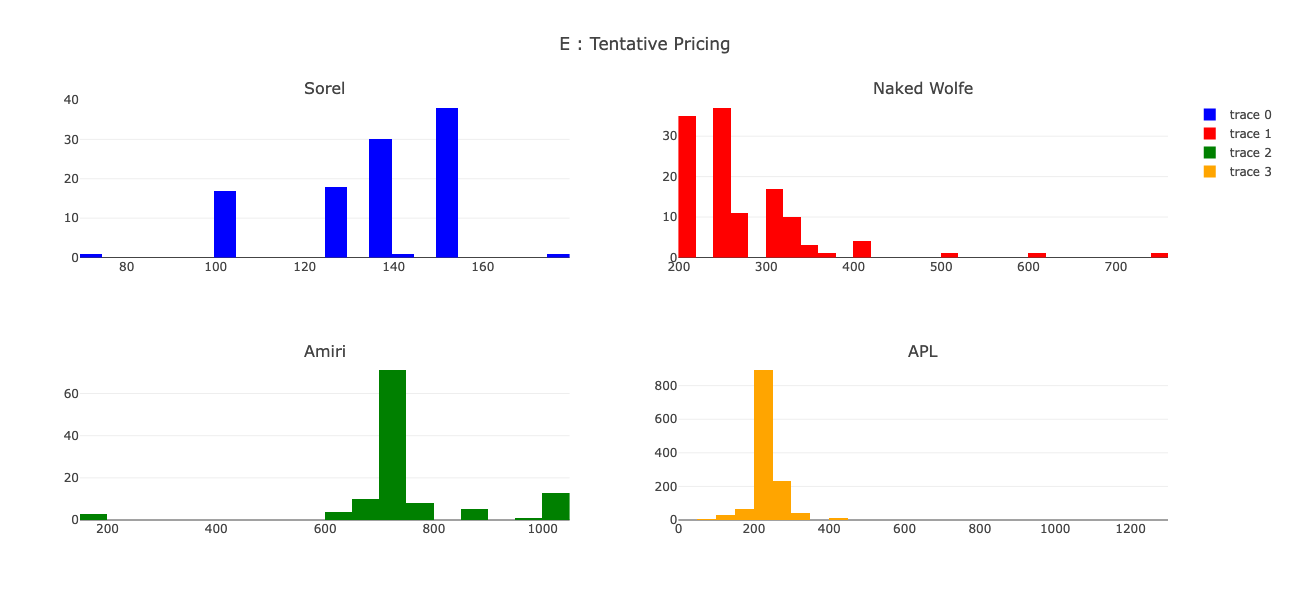

In [1827]:

fig = make_subplots(rows=2, cols=2, subplot_titles=tuple(df5.keys()))

# Add histograms to each subplot
fig.add_trace(go.Histogram(x=df5[_brandList[0]]['Price_Tentative'],nbinsx=40, marker=dict(color='blue')), row=1, col=1 )
fig.add_trace(go.Histogram(x=df5[_brandList[1]]['Price_Tentative'], nbinsx=40, marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Histogram(x=df5[_brandList[2]]['Price_Tentative'], nbinsx=40, marker=dict(color='green')), row=2, col=1)
fig.add_trace(go.Histogram(x=df5[_brandList[3]]['Price_Tentative'], nbinsx=40, marker=dict(color='orange')), row=2, col=2)


# Update layout
fig.update_layout(title_text="E : Tentative Pricing ",height=600, width=1000)

# Show the figure
fig.show()


In [1829]:
# _percentile = 0.95

_brandList = ['Represent', 'Pinko','Cole Haan', 'Golden Goose']

df5 ={}

for b in _brandList:
    df_temp = df[(df['new_Sub-category']=='sneaker') & (df['Brand_D2C']==b)][['Price_Tentative']]
    df5[b] = df_temp

values = [None]*4

i = 0

for k in _brandList:
    print(k)
    values[i] = df5[k]['Price_Tentative']
    i=i+1

Represent
Pinko
Cole Haan
Golden Goose


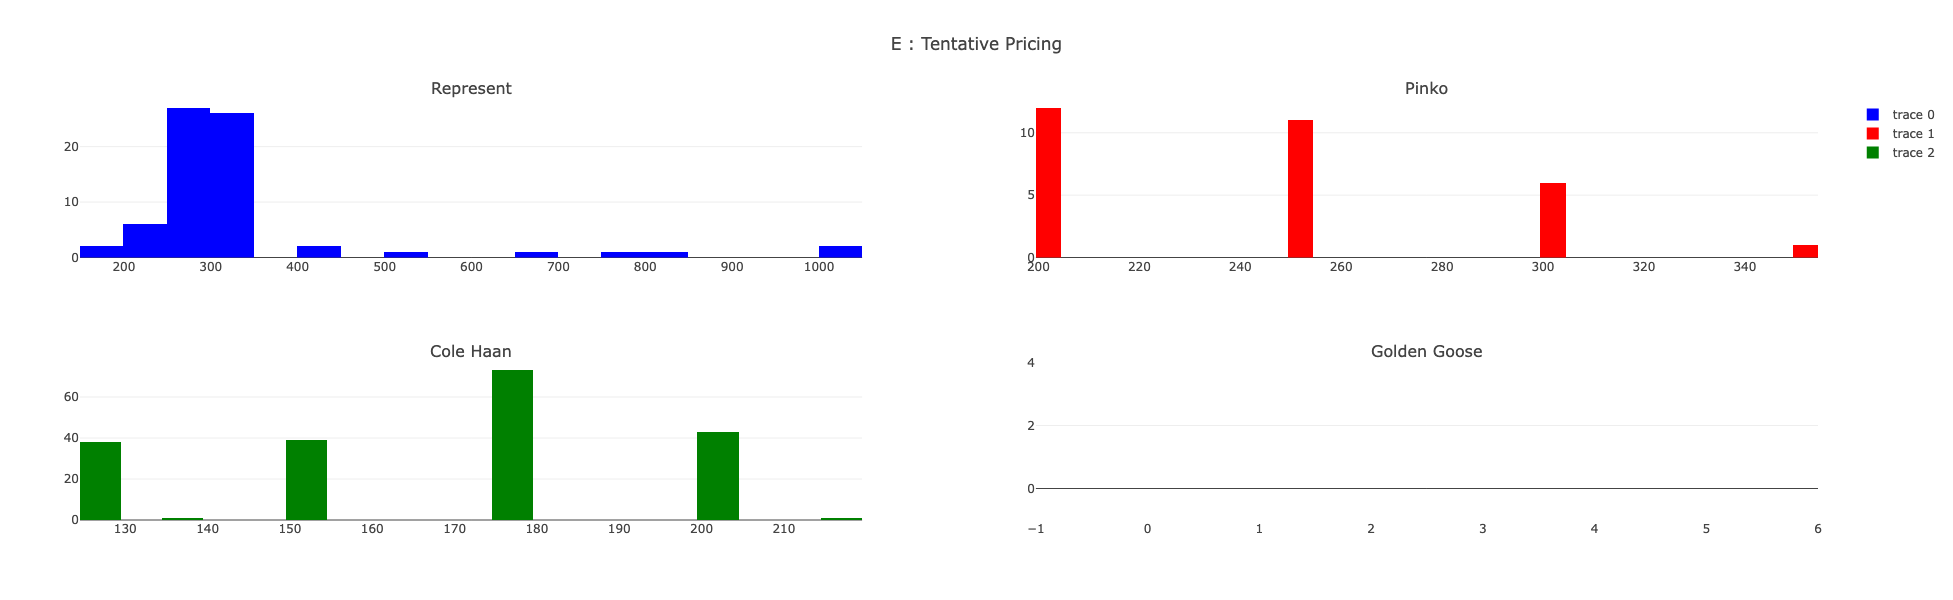

In [1831]:

fig = make_subplots(rows=2, cols=2, subplot_titles=tuple(df5.keys()))

# Add histograms to each subplot
fig.add_trace(go.Histogram(x=df5[_brandList[0]]['Price_Tentative'],nbinsx=40, marker=dict(color='blue')), row=1, col=1 )
fig.add_trace(go.Histogram(x=df5[_brandList[1]]['Price_Tentative'], nbinsx=40, marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Histogram(x=df5[_brandList[2]]['Price_Tentative'], nbinsx=40, marker=dict(color='green')), row=2, col=1)
fig.add_trace(go.Histogram(x=df5[_brandList[3]]['Price_Tentative'], nbinsx=40, marker=dict(color='orange')), row=2, col=2)


# Update layout
fig.update_layout(title_text="E : Tentative Pricing ",height=600, width=1000)

# Show the figure
fig.show()


In [1833]:
# _percentile = 0.95

_brandList = ['Diesel', 'Loci', 'Axel Arigato',
       'Off-white']

df5 ={}

for b in _brandList:
    df_temp = df[(df['new_Sub-category']=='sneaker') & (df['Brand_D2C']==b)][['Price_Tentative']]
    df5[b] = df_temp

values = [None]*4

i = 0

for k in _brandList:
    print(k)
    values[i] = df5[k]['Price_Tentative']
    i=i+1

Diesel
Loci
Axel Arigato
Off-white


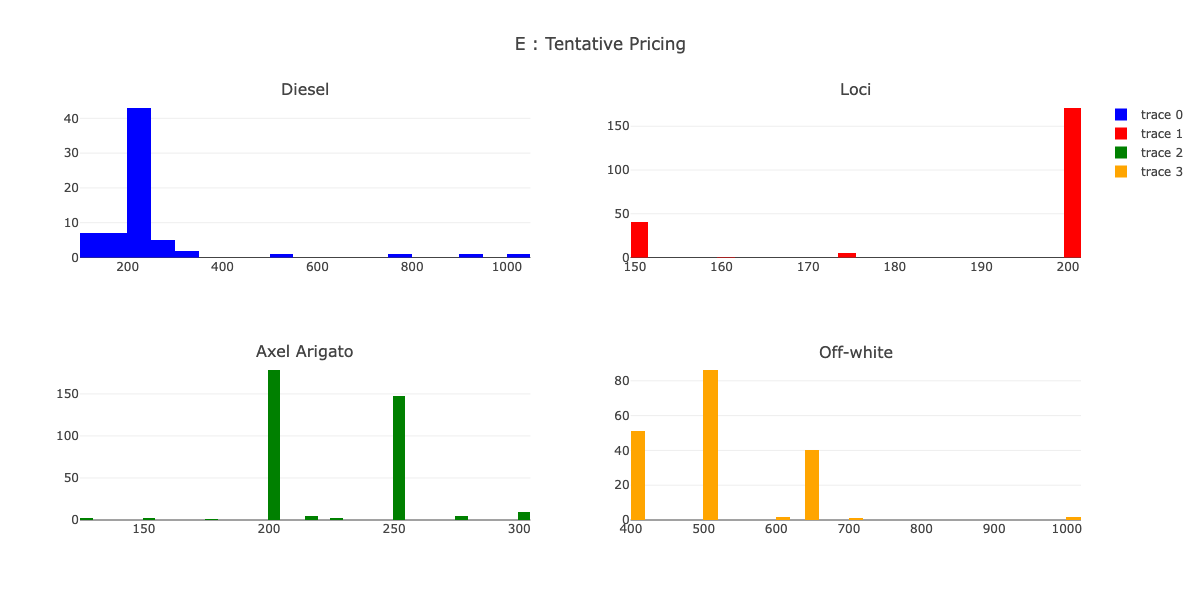

In [1835]:

fig = make_subplots(rows=2, cols=2, subplot_titles=tuple(df5.keys()))

# Add histograms to each subplot
fig.add_trace(go.Histogram(x=df5[_brandList[0]]['Price_Tentative'],nbinsx=40, marker=dict(color='blue')), row=1, col=1 )
fig.add_trace(go.Histogram(x=df5[_brandList[1]]['Price_Tentative'], nbinsx=40, marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Histogram(x=df5[_brandList[2]]['Price_Tentative'], nbinsx=40, marker=dict(color='green')), row=2, col=1)
fig.add_trace(go.Histogram(x=df5[_brandList[3]]['Price_Tentative'], nbinsx=40, marker=dict(color='orange')), row=2, col=2)


# Update layout
fig.update_layout(title_text="E : Tentative Pricing ",height=600, width=1000)

# Show the figure
fig.show()


In [ ]:
go.Histogram(x=df5[_brandList[0]]['Price_Tentative'],nbinsx=40, marker=dict(color='blue')), row=1, col=1 )

In [1861]:
perce = 0.95
dfnew = df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['Price_Tentative'].quantile(perce).reset_index().sort_values('Price_Tentative')

In [1863]:
dfnew

,Brand_D2C,Price_Tentative
10,Sorel,150.0
3,Cole Haan,200.0
5,Loci,200.0
0,APL,250.0
2,Axel Arigato,250.0
8,Pinko,300.0
6,Naked Wolfe,400.0
4,Diesel,430.0
7,Off-white,650.0
9,Represent,710.0


In [1865]:
perce = 0.80
dfnew = df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['Price_Tentative'].quantile(perce).reset_index().sort_values('Price_Tentative')
dfnew

,Brand_D2C,Price_Tentative
10,Sorel,150.0
3,Cole Haan,200.0
4,Diesel,200.0
5,Loci,200.0
0,APL,250.0
2,Axel Arigato,250.0
6,Naked Wolfe,300.0
8,Pinko,300.0
9,Represent,325.0
7,Off-white,650.0


In [1881]:
df = df[df.MinPrice_Tentative>0]

In [1889]:
dd = pd.merge(df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['MinPrice_Tentative'].quantile(perce).reset_index().sort_values('MinPrice_Tentative'), 
         df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['MaxPrice_Tentative'].quantile(perce).reset_index().sort_values('MaxPrice_Tentative'),
         on='Brand_D2C', how='inner')

dd = pd.merge(dd, 
         df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['Price_Tentative'].quantile(perce).reset_index().sort_values('Price_Tentative'),
         on='Brand_D2C', how='inner')

dd

,Brand_D2C,MinPrice_Tentative,MaxPrice_Tentative,Price_Tentative
0,Sorel,120.0,180.0,150.0
1,Cole Haan,150.0,250.0,200.0
2,Diesel,150.0,250.0,200.0
3,Loci,150.0,250.0,200.0
4,APL,200.0,300.0,250.0
5,Axel Arigato,200.0,300.0,250.0
6,Naked Wolfe,250.0,350.0,300.0
7,Pinko,250.0,350.0,300.0
8,Represent,250.0,400.0,325.0
9,Off-white,500.0,800.0,650.0


In [1895]:
df.Brand_D2C.nunique()

12

In [1891]:
dd = pd.merge(df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['MinPrice_Tentative'].min().reset_index().sort_values('MinPrice_Tentative'), 
         df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['MaxPrice_Tentative'].max().reset_index().sort_values('MaxPrice_Tentative'),
         on='Brand_D2C', how='inner')

dd = pd.merge(dd, 
         df[df['new_Sub-category']=='sneaker'].groupby('Brand_D2C')['Price_Tentative'].quantile(perce).reset_index().sort_values('Price_Tentative'),
         on='Brand_D2C', how='inner')

dd = dd.sort_values('Price_Tentative')
dd

,Brand_D2C,MinPrice_Tentative,MaxPrice_Tentative,Price_Tentative
1,Sorel,60,200,150.0
2,Diesel,80,1200,200.0
4,Cole Haan,100,250,200.0
6,Loci,120,250,200.0
0,APL,40,2000,250.0
3,Axel Arigato,100,350,250.0
8,Naked Wolfe,150,900,300.0
9,Pinko,150,400,300.0
7,Represent,120,1200,325.0
10,Off-white,300,1200,650.0


In [1920]:
col = 'Dominant colour'

df_temp = df[df['new_Sub-category']=='sneaker']
df_temp = get_frequency(df_temp, col)
df_temp = df_temp.reset_index()
df_temp.drop(columns='index', inplace=True)
df_temp['color_HEX'] = df_temp[col].apply(lambda x: get_hex(x))
df_temp['word_freq%'] = round((df_temp['word_freq'] / df_temp['word_freq'].sum()) * 100,1)

In [1922]:
df_temp.sort_values('word_freq', ascending=False).head(30)

,Dominant colour,word_freq,color_HEX,word_freq%
0,white,739,#FFFFFF,14.7
1,cream,482,#FFFDD0,9.6
2,offwhite,477,#F8F8F0,9.5
3,light,404,#FFFFF8,8.0
4,black,389,#000000,7.7
5,blue,245,#0000FF,4.9
6,grey,223,#808080,4.4
7,pink,157,#FFC0CB,3.1
8,beige,157,#F5F5DC,3.1
9,navy,129,#000080,2.6


In [1940]:
df[(df['new_Sub-category']=='sneaker')
&
(df['Brand_D2C']=='Sorel')
][['Price_Tentative']].sort_values('Price_Tentative').reset_index()

,index,Price_Tentative
0,715,70.0
1,382,100.0
2,544,100.0
3,530,100.0
4,529,100.0
...,...,...
101,496,150.0
102,497,150.0
103,541,150.0
104,868,150.0


In [1944]:
np.percentile(df[(df['new_Sub-category']=='sneaker')
&
(df['Brand_D2C']=='Sorel')
][['Price_Tentative']], 80)

150.0

In [26]:
col = 'Design Elements'

In [186]:
df_ = df[df['Brand_D2C']=='Sorel'][[col]]

In [188]:
df_.head(3)

,Design Elements
0,"Lace-up closure, faux fur trim, rubber sole, l..."
1,"Lace-up closure, rubber toe cap, contrasting c..."
2,"Lace-up closure, shearling/faux fur lining, ru..."


In [190]:
def find_word_combination_occurrences(items_list):

    word_combinations = []
    for item in items_list:
        word_comb = re.split(r'[,]', item)
        for wc in word_comb:
            wc = wc.strip()
            wc = wc.replace(".","")
            word_combinations.append(wc)

    word_combinations_lemma = []
    for wc in word_combinations:
        wc_lemma = lemmatize_text(wc)
        word_combinations_lemma.append(wc_lemma)
    
    return word_combinations_lemma

In [192]:

df_[col] = df_[col].str.lower()
df_[col] = df_[col].str.strip()

In [238]:
items_list = df_[col].to_list()

text_word_combination  = find_word_combination_occurrences(items_list)

word_list = list(set(text_word_combination))

word_occurrences = {}
for word in word_list:
    word_occurrences[word] = text_word_combination.count(word)

WF = pd.DataFrame(list(word_occurrences.items()), columns=[col, 'word_freq'])
WF = WF.sort_values('word_freq', ascending=False)
WF = WF.reset_index()
WF.drop(columns='index', inplace=True)
WF['word_freq_perc'] = round((WF['word_freq']/WF['word_freq'].sum())*100,0)
WF['Brand_D2C'] = 'Sorel'
WF['distribution'] = WF[col] + " : " + WF['word_freq_perc'].astype('str')+"%"

WF = WF.groupby(['Brand_D2C']).agg(
    distribution = ('distribution', list)
).reset_index()
WF.rename(columns={'distribution':col}, inplace=True)



,Brand_D2C,Design Elements
0,Sorel,"[lace-up closure : 7.0%, suede upper : 5.0%, f..."


In [230]:
WF = pd.concat([WF, WF], axis=0)
WF




,Brand_D2C,col
0,Sorel,"[lace-up closure : 7.0%, suede upper : 5.0%, f..."
0,Sorel,"[lace-up closure : 7.0%, suede upper : 5.0%, f..."
